In [1]:
import cv2
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
# import tflearn

/Users/imperatore/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
Use the retry module or similar alternatives.


/Users/imperatore/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [2]:
mnist_data_folder='../assets'
mnist=input_data.read_data_sets(mnist_data_folder, one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ../assets/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ../assets/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ../assets/t10k-images-idx3-ubyte.gz
Extracting ../assets/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
print('训练集信息：')
print(mnist.train.images.shape,mnist.train.labels.shape)
print('测试集信息：')
print(mnist.test.images.shape,mnist.test.labels.shape)
print('验证集信息：')
print(mnist.validation.images.shape,mnist.validation.labels.shape)

训练集信息：
(55000, 784) (55000, 10)
测试集信息：
(10000, 784) (10000, 10)
验证集信息：
(5000, 784) (5000, 10)


In [4]:
img1 = cv2.imread('../data/1_0.jpg', cv2.IMREAD_GRAYSCALE).reshape(1, -1) / 255.0
img2 = cv2.imread('../data/2_0.jpg', cv2.IMREAD_GRAYSCALE).reshape(1, -1) / 255.0
img3 = cv2.imread('../data/3_0.jpg', cv2.IMREAD_GRAYSCALE).reshape(1, -1) / 255.0
img4 = cv2.imread('../data/4_0.jpg', cv2.IMREAD_GRAYSCALE).reshape(1, -1) / 255.0
img5 = cv2.imread('../data/5_0.jpg', cv2.IMREAD_GRAYSCALE).reshape(1, -1) / 255.0
img6 = cv2.imread('../data/6_0.jpg', cv2.IMREAD_GRAYSCALE).reshape(1, -1) / 255.0
img7 = cv2.imread('../data/7_0.jpg', cv2.IMREAD_GRAYSCALE).reshape(1, -1) / 255.0
img8 = cv2.imread('../data/8_0.jpg', cv2.IMREAD_GRAYSCALE).reshape(1, -1) / 255.0
img9 = cv2.imread('../data/9_0.jpg', cv2.IMREAD_GRAYSCALE).reshape(1, -1) / 255.0
img0 = cv2.imread('../data/0_0.jpg', cv2.IMREAD_GRAYSCALE).reshape(1, -1) / 255.0
imgs = np.vstack(
    [img1, img2, img3, img4, img5, img6, img7, img8, img9, img0])
imgs[imgs < 0.015] = 0

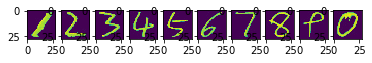

In [5]:
plt.subplot(1,10,1).imshow(img1.reshape(28, 28))
plt.subplot(1,10,2).imshow(img2.reshape(28, 28))
plt.subplot(1,10,3).imshow(img3.reshape(28, 28))
plt.subplot(1,10,4).imshow(img4.reshape(28, 28))
plt.subplot(1,10,5).imshow(img5.reshape(28, 28))
plt.subplot(1,10,6).imshow(img6.reshape(28, 28))
plt.subplot(1,10,7).imshow(img7.reshape(28, 28))
plt.subplot(1,10,8).imshow(img8.reshape(28, 28))
plt.subplot(1,10,9).imshow(img9.reshape(28, 28))
plt.subplot(1,10,10).imshow(img0.reshape(28, 28))

plt.show()

In [6]:
def conv_net(X, w, w2, w3, w4, w_o, p_keep_conv, p_keep_hidden):
    #第一个卷积层:padding=SAME,保证输出的feature map与输入矩阵的大小相同
    l1a = tf.nn.relu(tf.nn.conv2d(X, w,                       # l1a shape=(?, 28, 28, 32)
                        strides=[1, 1, 1, 1], padding='SAME'))
    #max_pooling,窗口大小为2x2
    l1 = tf.nn.max_pool(l1a, ksize=[1, 2, 2, 1],              # l1 shape=(?, 14, 14, 32)
                        strides=[1, 2, 2, 1], padding='SAME')
    #dropout:每个神经元有p_keep_conv的概率以1/p_keep_conv的比例进行归一化,有(1-p_keep_conv)的概率置为0
    l1 = tf.nn.dropout(l1, p_keep_conv)

    #第二个卷积层
    l2a = tf.nn.relu(tf.nn.conv2d(l1, w2,                     # l2a shape=(?, 14, 14, 64)
                        strides=[1, 1, 1, 1], padding='SAME'))
    l2 = tf.nn.max_pool(l2a, ksize=[1, 2, 2, 1],              # l2 shape=(?, 7, 7, 64)
                        strides=[1, 2, 2, 1], padding='SAME')
    l2 = tf.nn.dropout(l2, p_keep_conv)

    #第三个卷积层
    l3a = tf.nn.relu(tf.nn.conv2d(l2, w3,                     # l3a shape=(?, 7, 7, 128)
                        strides=[1, 1, 1, 1], padding='SAME'))
    l3 = tf.nn.max_pool(l3a, ksize=[1, 2, 2, 1],              # l3 shape=(?, 4, 4, 128)
                        strides=[1, 2, 2, 1], padding='SAME')
    #将所有的feature map合并成一个2048维向量
    l3 = tf.reshape(l3, [-1, w4.get_shape().as_list()[0]])    # reshape to (?, 2048)
    l3 = tf.nn.dropout(l3, p_keep_conv)
    #后面两层为全连接层
    l4 = tf.nn.relu(tf.matmul(l3, w4))
    l4 = tf.nn.dropout(l4, p_keep_hidden)
    pyx = tf.matmul(l4, w_o)
    
    return pyx

In [7]:
#初始化参数
def init_weights(shape):
    return tf.Variable(tf.random_normal(shape, stddev=0.01))

In [8]:
batch_size = 128
test_size = 256

In [9]:
trX, trY, teX, teY = mnist.train.images, mnist.train.labels, mnist.test.images, mnist.test.labels
trX = trX.reshape(-1, 28, 28, 1)  # 将每张图片用一个28x28的矩阵表示,(55000,28,28,1)
teX = teX.reshape(-1, 28, 28, 1)  # 将每张图片用一个28x28的矩阵表示,(1000,28,28,1)

In [10]:
_y = np.zeros((55000, 7))
yy = np.hstack([trY, _y])

In [11]:
X = tf.placeholder("float", [None, 28, 28, 1])
Y = tf.placeholder("float", [None, 17])

In [12]:
w = init_weights([3, 3, 1, 32])       # 第一层卷积核大小为3x3,输入一张图,输出32个feature map
w2 = init_weights([3, 3, 32, 64])     # 第二层卷积核大小为3x3,输入32个feature map,输出64个feature map
w3 = init_weights([3, 3, 64, 128])    # 第三层卷积核大小为3x3,输入64个feature map,输出128个feature map
w4 = init_weights([128 * 4 * 4, 625]) # FC 128 * 4 * 4 inputs, 625 outputs
w_o = init_weights([625, 17])         # FC 625 inputs, 10 outputs (labels)

In [13]:
p_keep_conv = tf.placeholder("float") # 卷积层的dropout概率
p_keep_hidden = tf.placeholder("float")# 全连接层的dropout概率
py_x = conv_net(X, w, w2, w3, w4, w_o, p_keep_conv, p_keep_hidden)

In [14]:
#初始化变量
# init = tf.initialize_all_variables()
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=py_x, labels=Y))# 交叉熵目标函数
train_op = tf.train.RMSPropOptimizer(0.001, 0.9).minimize(cost)#RMSPro算法最小化目标函数

#评估模型
predict_op = tf.argmax(py_x, 1)#返回每个样本的预测结果

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



In [15]:
# Launch the graph in a session
import time
tmp_time = time.time()
with tf.Session() as sess:
    # you need to initialize all variables
    tf.initialize_all_variables().run()

    for i in range(3):
        training_batch = zip(range(0, len(trX), batch_size),
                             range(batch_size, len(trX)+1, batch_size))
        for start, end in training_batch:
            sess.run(train_op, feed_dict={X: trX[start:end], Y: yy[start:end],
                                          p_keep_conv: 0.8, p_keep_hidden: 0.5})
        #test
        test_indices = np.arange(len(teX)) 
        np.random.shuffle(test_indices)
        test_indices = test_indices[0:test_size]

        print(i, np.mean(np.argmax(teY[test_indices], axis=1) ==
                         sess.run(predict_op, feed_dict={X: teX[test_indices],
                                                         p_keep_conv: 1.0,
                                                         p_keep_hidden: 1.0})))
    saver = tf.train.Saver()  ##保存的API
    save_path = saver.save(sess,"./Test_MNIST_CNN.ckpt")
    print("save model:{0} Finished".format(save_path))
print('time cost:', time.time() - tmp_time)

Instructions for updating:
Use `tf.global_variables_initializer` instead.
0 0.9453125
1 0.984375
2 0.9921875
save model:./Test_MNIST_CNN.ckpt Finished
time cost: 252.05000686645508


In [19]:
import os
base_path = '../data/jpg/'
nums = os.listdir(base_path)
td = []
tl = []
lbl = [[1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
      [0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
      [0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
      [0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
      [0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0],
      [0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
      [0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0],
      [0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0],
      [0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0],
      [0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0],
      [0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0],
      [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0],
      [0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0],
      [0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0],
      [0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0],
      [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0],
      [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1]]
for num in nums:
    jpgs = os.listdir(os.path.join(base_path, num))
    for jpg in jpgs:
        fname = os.path.join(base_path, num, jpg)
        pic = 1 - cv2.imread(fname, cv2.IMREAD_GRAYSCALE) / 255.0
        td.append(pic)
        tl.append(lbl[int(num)])
td = np.array(td)
tl = np.array(tl)

IndexError: index 40 is out of bounds for axis 0 with size 40

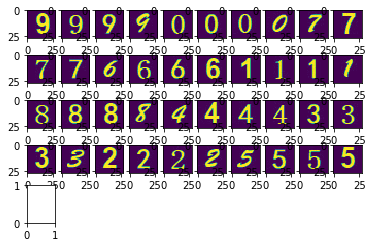

In [20]:
for i in range(1, 48):
    plt.subplot(5, 10, i)
    plt.imshow(td[i-1])
plt.show()

In [21]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
saver = tf.train.Saver()  ##保存的API
# load_path = saver.restore(sess,"model/Test_MNIST_CNN.ckpt")  #load上一步训练的参数
with tf.Session() as sess:
    #sess.run(init) #不使用训练好的参数
    load_path = saver.restore(sess,"./Test_MNIST_CNN.ckpt")  #load上一步训练的参数
    
    pred = sess.run(predict_op, feed_dict={X: td.reshape(-1, 28, 28, 1), p_keep_conv: 1.0, p_keep_hidden: 1.0})
    print("Testing Result:", pred)

INFO:tensorflow:Restoring parameters from ./Test_MNIST_CNN.ckpt
Testing Result: [9 9 9 9 0 0 0 0 2 7 7 7 6 5 6 8 1 1 1 1 8 8 8 8 4 4 4 4 3 3 3 3 2 2 2 8 5
 5 5 5]


In [24]:
# Launch the graph in a session
import time
tmp_time = time.time()
with tf.Session() as sess:
    # you need to initialize all variables
    tf.initialize_all_variables().run()

    for i in range(3):
        training_batch = zip(range(0, len(trX), batch_size),
                             range(batch_size, len(trX)+1, batch_size))
        for start, end in training_batch:
#             print(trX.shape, td.reshape(-1, 28, 28, 1).shape, trY[start:end].shape, tl.shape)
            sess.run(train_op, feed_dict={X: np.vstack([trX[start:end], td.reshape(-1, 28, 28, 1)]), 
                                          Y: np.vstack([yy[start:end], tl]),
                                          p_keep_conv: 0.8, p_keep_hidden: 0.5})
        #test
        test_indices = np.arange(len(teX)) 
        np.random.shuffle(test_indices)
        test_indices = test_indices[0:test_size]

        print(i, np.mean(np.argmax(teY[test_indices], axis=1) ==
                         sess.run(predict_op, feed_dict={X: teX[test_indices],
                                                         p_keep_conv: 1.0,
                                                         p_keep_hidden: 1.0})))
    saver = tf.train.Saver()  ##保存的API
    save_path = saver.save(sess,"./Test_MNIST_CNN.ckpt")
    print("save model:{0} Finished".format(save_path))
print('time cost:', time.time() - tmp_time)

(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 

(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 

(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 

(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 

(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 

(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 

(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 

(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 

(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 28, 1) (128, 10) (40, 17)
(55000, 28, 28, 1) (40, 28, 

In [25]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
saver = tf.train.Saver()  ##保存的API
# load_path = saver.restore(sess,"model/Test_MNIST_CNN.ckpt")  #load上一步训练的参数
with tf.Session() as sess:
    #sess.run(init) #不使用训练好的参数
    load_path = saver.restore(sess,"./Test_MNIST_CNN.ckpt")  #load上一步训练的参数
    
    pred = sess.run(predict_op, feed_dict={X: td.reshape(-1, 28, 28, 1), p_keep_conv: 1.0, p_keep_hidden: 1.0})
    print("Testing Result:", pred)

INFO:tensorflow:Restoring parameters from ./Test_MNIST_CNN.ckpt
Testing Result: [9 9 9 9 0 0 0 0 7 7 7 7 6 6 6 6 1 1 1 1 8 8 8 8 4 4 4 4 3 3 3 3 2 2 2 2 5
 5 5 5]
